In [1]:
import seaborn as sns
import pandas as pd

iris_df = sns.load_dataset('iris')

In [3]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
import plotly.express as px
fig = px.scatter_3d(iris_df, x='sepal_length', y='sepal_width', z='petal_width', color='species')
fig.show()

In [5]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<AxesSubplot:xlabel='species', ylabel='petal_length'>

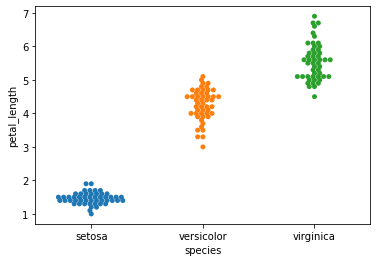

In [6]:
sns.swarmplot(x='species', y='petal_length', data=iris_df)

In [ ]:
sns.pairplot(iris_df, hue='species')

In [ ]:
from sklearn import tree
import mlflow
import mlflow.sklearn
import shutil

model_name = 'iris'

mlflow.set_tracking_uri('databricks')
mlflow.set_experiment('/Experiments/iris')

with mlflow.start_run() as run:
  iris_data = iris_df.loc[:, ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
  iris_target = iris_df.loc[:, ['species']]

  sk_model = tree.DecisionTreeClassifier()
  sk_model = sk_model.fit(iris_data, iris_target)
  
  mlflow.log_param('criterion', sk_model.criterion)
  mlflow.log_param('splitter', sk_model.splitter)
  
  # log model
  mlflow.sklearn.log_model(iris_df, registered_model_name=model_name, artifact_path='model')
  mlflow.sklearn.save_model(sk_model, run.info.run_id, serialization_format=mlflow.sklearn.SERIALIZATION_FORMAT_CLOUDPICKLE)

  # compare output
  runs_df = mlflow.search_runs(run.info.experiment_id)

  shutil.rmtree(run.info.run_id, ignore_errors=True)
  shutil.rmtree('mlruns', ignore_errors=True)

In [ ]:
runs_df